# Model Selection and Evaluation

---

## Logistic Regression

In [1]:
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
#load prepared dataset from notebook
loan_prepared = np.loadtxt('loan_prepared.txt')
loan_labels = np.loadtxt('loan_labels.txt')

In [3]:
#load logistic regression model
log_reg = LogisticRegression()

In [4]:
#fit model onto data
log_reg.fit(loan_prepared, loan_labels)

LogisticRegression()

In [5]:
#make predictions
loan_predictions = log_reg.predict(loan_prepared)

In [6]:
#array of f1 scores
log_score = cross_val_score(log_reg, loan_prepared, loan_labels, scoring='f1', cv=10)

In [7]:
#create scoring metric for training set
def train_scores(model):
    for scores in ['f1','precision','recall','accuracy']:
        cvs = cross_val_score(model, loan_prepared, loan_labels, scoring=scores, cv=10).mean()
        print(scores + " : "+ str(cvs))

In [8]:
#calculate scores of predictions using cross validation
train_scores(log_reg)

f1 : 0.941672046632743
precision : 0.9184927762967652
recall : 0.9661058957250205
accuracy : 0.9036781601369823


---

## Random Forest Classifier

In [9]:
#load random forest classifier model
rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt')

In [10]:
#fit model onto data
rfc.fit(loan_prepared, loan_labels)

RandomForestClassifier(max_features='sqrt')

In [11]:
#make predictions
loan_predictions = rfc.predict(loan_prepared)

In [12]:
#array of f1 scores
rfc_score = cross_val_score(rfc, loan_prepared, loan_labels, scoring='f1', cv=10)

In [13]:
#calculate scores of predictions using cross validation
train_scores(rfc)

f1 : 0.9927349677783439
precision : 0.9889229628674368
recall : 0.9969184786040539
accuracy : 0.9877325444834406


In [14]:
#tune hyperparameters using grid search
param_grid = {'n_estimators': [100, 150, 200],'max_features': ['sqrt', 'log2']}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, scoring="f1")
grid_search.fit(loan_prepared, loan_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(max_features='sqrt'),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]},
             scoring='f1')

In [15]:
#find best hyperparameters
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 150}

In [16]:
#mean f1 score after tuning
print("f1 :", grid_search.cv_results_['mean_test_score'].max())

f1 : 0.9927366642342893


---

## Scores from Test Set

In [17]:
#use test set
test_features = np.loadtxt('test_features.txt')
test_labels = np.loadtxt('test_labels.txt')

In [18]:
#random forest classifier with hyperparameter tuning
rfc = RandomForestClassifier(n_estimators = 150, max_features='log2')

In [19]:
#fit model onto data
rfc.fit(test_features, test_labels)

RandomForestClassifier(max_features='log2', n_estimators=150)

In [20]:
#make predictions
test_predictions = rfc.predict(test_features)

In [21]:
#array of f1 scores
test_score = cross_val_score(rfc, test_features, test_labels, scoring='f1', cv=10)
test_score

array([0.9903537 , 0.99041534, 0.97791798, 0.98717949, 0.98701299,
       0.9903537 , 0.9903537 , 0.99676375, 0.99354839, 0.99676375])

In [22]:
#create scoring metric for testing set
def test_scores(model):
    for scores in ['f1','precision','recall','accuracy']:
        cvs = cross_val_score(model, test_features, test_labels, scoring=scores, cv=10).mean()
        print(scores + " : "+ str(cvs))

In [23]:
#calculate scores of predictions using cross validation
test_scores(rfc)

f1 : 0.9907177100126748
precision : 0.9822903947542281
recall : 0.9987054880603268
accuracy : 0.9853975785340315


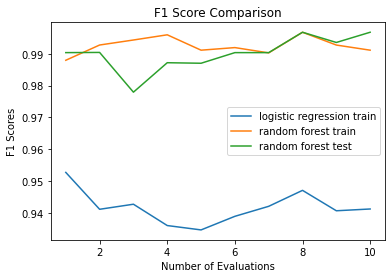

In [24]:
plt.plot(np.array(range(1,11)), log_score, label = 'logistic regression train')
plt.plot(np.array(range(1,11)), rfc_score, label = 'random forest train')
plt.plot(np.array(range(1,11)), test_score, label = 'random forest test')
plt.xlabel('Number of Evaluations')
plt.ylabel('F1 Scores')
plt.title('F1 Score Comparison')
plt.legend()
plt.show()